In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
dataset = pd.read_csv('/Users/jhajhajhajha1/Desktop/Hanyang Data/data_playaround.csv')

In [4]:
data = dataset.iloc[:, 0:19]

In [5]:
print(len(data))
data[1000:1010]

46858


,W_ZONE,no_hh,no_hh_chil,hh_type,hh_income,no_car,age,sex,job_type,house_lat,house_lon,work_lat,work_lon,H_ZONE,H_ZONE_X,H_ZONE_Y,W_ZONE_X,W_ZONE_Y,0
1000,88,4.0,3.0,1.0,5.0,1.0,40.0,1.0,4.0,37.511534,126.902390,37.031954,127.077127,954.0,191000.0,445000.0,207000.0,393000.0,25940.567472
1001,88,3.0,3.0,4.0,2.0,2.0,61.0,1.0,6.0,37.000396,127.106922,37.034933,127.078710,50.0,209000.0,389000.0,207000.0,393000.0,25940.567472
1002,88,5.0,3.0,1.0,4.0,1.0,46.0,1.0,4.0,37.195733,127.034267,37.039019,127.077925,287.0,203000.0,411000.0,207000.0,393000.0,25940.567472
1003,88,4.0,4.0,2.0,6.0,1.0,49.0,1.0,6.0,37.067362,127.056343,37.037719,127.077653,130.0,205000.0,397000.0,207000.0,393000.0,25940.567472
1004,88,4.0,2.0,1.0,3.0,1.0,37.0,1.0,4.0,37.151695,127.078077,37.039019,127.077925,218.0,207000.0,405000.0,207000.0,393000.0,25940.567472
1005,88,3.0,3.0,1.0,5.0,1.0,56.0,1.0,6.0,37.053694,127.047655,37.038303,127.082699,105.0,205000.0,395000.0,207000.0,393000.0,25940.567472
1006,88,3.0,3.0,4.0,6.0,1.0,55.0,1.0,6.0,37.102160,127.021462,37.036618,127.077674,173.0,201000.0,401000.0,207000.0,393000.0,25940.567472
1007,88,4.0,4.0,2.0,5.0,1.0,41.0,1.0,6.0,37.037146,127.029241,37.035418,127.074294,86.0,203000.0,393000.0,207000.0,393000.0,25940.567472
1008,88,1.0,1.0,2.0,4.0,1.0,49.0,1.0,6.0,37.076516,127.064009,37.036774,127.072348,130.0,205000.0,397000.0,207000.0,393000.0,25940.567472
1009,88,3.0,3.0,1.0,5.0,1.0,43.0,1.0,6.0,36.989866,127.090719,37.037373,127.088846,35.0,209000.0,387000.0,207000.0,393000.0,25940.567472


In [6]:
# preprocessing

# not calculating distance, simply using latitude
x = data.iloc[:, 0:13]
x = x.drop(["house_lat", "house_lon"], axis= 1)
x.head()

,W_ZONE,no_hh,no_hh_chil,hh_type,hh_income,no_car,age,sex,job_type,work_lat,work_lon
0,0,4.0,4.0,1.0,5.0,1.0,41.0,1.0,4.0,36.115620,126.792747
1,0,3.0,3.0,2.0,3.0,1.0,36.0,1.0,4.0,37.335447,126.677584
2,0,3.0,3.0,2.0,2.0,1.0,70.0,1.0,9.0,36.975082,127.436894
3,0,5.0,4.0,1.0,5.0,1.0,32.0,1.0,4.0,36.847868,127.414170
4,0,2.0,2.0,4.0,3.0,1.0,55.0,1.0,4.0,37.967527,124.717824


In [7]:
x.isnull().sum()

W_ZONE          0
no_hh         180
no_hh_chil    180
hh_type       180
hh_income     180
no_car        180
age           180
sex           180
job_type      180
work_lat      180
work_lon      180
dtype: int64

In [8]:
# # Taking care of missing data
# from sklearn.preprocessing import Imputer
# imputer = Imputer(missing_values = 'NaN', strategy = 'mean', axis = 0)
# imputer = imputer.fit(x.iloc[:, 1:10])
# x.iloc[:, 1:10] = imputer.transform(x.iloc[:, 1:10])
x = x.dropna()

In [9]:
x.isnull().sum()

W_ZONE        0
no_hh         0
no_hh_chil    0
hh_type       0
hh_income     0
no_car        0
age           0
sex           0
job_type      0
work_lat      0
work_lon      0
dtype: int64

In [10]:
# category values: hh_type, hh_income (this one is fine because of the levels)
# Encoding categorical data


In [11]:
y = data.loc[:, ["house_lat", "house_lon"]]
y.head()

,house_lat,house_lon
0,37.453952,126.716877
1,37.465845,126.717234
2,37.229621,127.284122
3,37.623500,127.083187
4,37.469676,126.644354


In [12]:
y.isnull().sum()

house_lat    180
house_lon    180
dtype: int64

In [13]:
# # Taking care of missing data
# from sklearn.preprocessing import Imputer
# imputer = Imputer(missing_values = 'NaN', strategy = 'mean', axis = 0)
# imputer = imputer.fit(y)
# y = imputer.transform(y)
y = y.dropna()

In [14]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

In [15]:
# Feature Scaling
# from sklearn.preprocessing import StandardScaler
# sc = StandardScaler()
# X_train = sc.fit_transform(X_train)
# X_test = sc.transform(X_test)
# Normalization
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [16]:
# Random Forest Regression
# Fitting the Random Forest Regression Model to the dataset
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators = 300, random_state = 0)
regressor.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=300, n_jobs=1,
           oob_score=False, random_state=0, verbose=0, warm_start=False)

In [17]:
y_pred = regressor.predict(X_test)

In [18]:
prediction = pd.DataFrame({'house_lat': y_test.iloc[:, 0],'house_lon':y_test.iloc[:, 1],
                            'house_lat (pred)': y_pred[:,0], 'house_lon (pred)': y_pred[:,1]})

In [19]:
# accuracy based on distance
def accuracy(pred):
    sum_error = 0
    for i in range(len(pred)):
        deltax = pred.iloc[i][0]-pred.iloc[i][2]
        deltay = pred.iloc[i][1]-pred.iloc[i][3]
        error = (deltax**2 + deltay**2)**(0.5)
        sum_error += error
    return sum_error


accuracy(prediction)

827.8395348077754

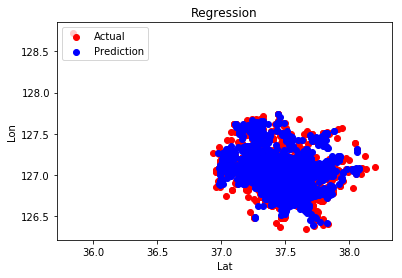

In [20]:
plt.scatter(y_test.iloc[:, 0], y_test.iloc[:, 1], color = "red", label = 'Actual')
plt.scatter(y_pred[:, 0], y_pred[:, 1], color = "blue", label = 'Prediction')
plt.title('Regression')
plt.xlabel('Lat')
plt.ylabel('Lon')
plt.legend(loc='upper left')
plt.show()

In [21]:
# SVR
from sklearn.svm import SVR
from sklearn.multioutput import MultiOutputRegressor

Svr = SVR(kernel = 'rbf')
regressor = MultiOutputRegressor(Svr)
regressor.fit(X_train, y_train)

MultiOutputRegressor(estimator=SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='auto',
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False),
           n_jobs=1)

In [22]:
y_pred = regressor.predict(X_test)

In [23]:
prediction = pd.DataFrame({'house_lat': y_test.iloc[:, 0],'house_lon':y_test.iloc[:, 1],
                            'house_lat (pred)': y_pred[:,0], 'house_lon (pred)': y_pred[:,1]})

In [24]:
accuracy(prediction)

910.4883383815289

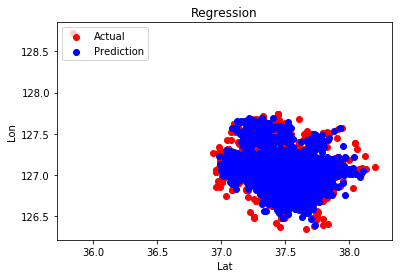

In [25]:
plt.scatter(y_test.iloc[:, 0], y_test.iloc[:, 1], color = "red", label = 'Actual')
plt.scatter(y_pred[:, 0], y_pred[:, 1], color = "blue", label = 'Prediction')
plt.title('Regression')
plt.xlabel('Lat')
plt.ylabel('Lon')
plt.legend(loc='upper left')
plt.show()

In [26]:
# Importing the Keras libraries and packages
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout

Using TensorFlow backend.
/usr/local/Cellar/python/3.6.5_1/Frameworks/Python.framework/Versions/3.6/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: compiletime version 3.5 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.6
  return f(*args, **kwds)


In [44]:
# Initialising the ANN
regressor = Sequential()

# Adding the input layer and the first hidden layer
regressor.add(Dense(units = 6, kernel_initializer = 'normal', activation = 'relu', input_dim = 11))
regressor.add(Dropout(0.2))

# Adding the second hidden layer
regressor.add(Dense(units = 6, kernel_initializer = 'normal', activation = 'relu'))
regressor.add(Dropout(0.2))

# Adding the third hidden layer
regressor.add(Dense(units = 6, kernel_initializer = 'normal', activation = 'relu'))
regressor.add(Dropout(0.2))

# Adding the fourth hidden layer
regressor.add(Dense(units = 6, kernel_initializer = 'normal', activation = 'relu'))
regressor.add(Dropout(0.2))

# Adding the fifth hidden layer
regressor.add(Dense(units = 6, kernel_initializer = 'normal', activation = 'relu'))
regressor.add(Dropout(0.2))

# Adding the output layer
regressor.add(Dense(units = 2, kernel_initializer = 'normal', activation = 'linear'))

# Compiling the ANN
regressor.compile(optimizer = 'sgd', loss = 'mean_squared_error', metrics = ['mae'])

array([[ 37.563692, 127.047606],
       [ 37.712381, 126.751078],
       [ 37.537452, 126.732833],
       ...,
       [ 37.686711, 126.764707],
       [ 37.602017, 127.093634],
       [ 37.334732, 127.107173]])

In [ ]:
regressor.fit(X_train, np.asarray(y_train), batch_size = 5, epochs = 100)

Epoch 1/100
37342/37342 [==============================] - 8s 213us/step - loss: 69.4116 - mean_absolute_error: 3.0747
Epoch 2/100
37342/37342 [==============================] - 8s 209us/step - loss: 0.0333 - mean_absolute_error: 0.1388
Epoch 3/100
37342/37342 [==============================] - 9s 238us/step - loss: 0.0306 - mean_absolute_error: 0.1332
Epoch 4/100
37342/37342 [==============================] - 8s 213us/step - loss: 0.0304 - mean_absolute_error: 0.1328
Epoch 5/100
37342/37342 [==============================] - 9s 230us/step - loss: 0.0304 - mean_absolute_error: 0.1328
Epoch 6/100
37342/37342 [==============================] - 9s 252us/step - loss: 0.0304 - mean_absolute_error: 0.1327
Epoch 7/100
37342/37342 [==============================] - 9s 235us/step - loss: 0.0304 - mean_absolute_error: 0.1327
Epoch 8/100
37342/37342 [==============================] - 12s 331us/step - loss: 0.0304 - mean_absolute_error: 0.1327
Epoch 9/100
37342/37342 [=============================

37342/37342 [==============================] - 8s 218us/step - loss: 0.0304 - mean_absolute_error: 0.1327
Epoch 68/100
37342/37342 [==============================] - 8s 212us/step - loss: 0.0304 - mean_absolute_error: 0.1327
Epoch 69/100
37342/37342 [==============================] - 8s 218us/step - loss: 0.0304 - mean_absolute_error: 0.1327
Epoch 70/100
37342/37342 [==============================] - 9s 249us/step - loss: 0.0304 - mean_absolute_error: 0.1327
Epoch 71/100
37342/37342 [==============================] - 9s 238us/step - loss: 0.0304 - mean_absolute_error: 0.1327
Epoch 72/100
37342/37342 [==============================] - 11s 298us/step - loss: 0.0304 - mean_absolute_error: 0.1327
Epoch 73/100
37342/37342 [==============================] - 9s 235us/step - loss: 0.0304 - mean_absolute_error: 0.1327
Epoch 74/100
37342/37342 [==============================] - 9s 244us/step - loss: 0.0304 - mean_absolute_error: 0.1327
Epoch 75/100
37342/37342 [==============================] - 

In [40]:
y_pred = regressor.predict(X_test)

In [41]:
prediction = pd.DataFrame({'house_lat': y_test.iloc[:, 0],'house_lon':y_test.iloc[:, 1],
                            'house_lat (pred)': y_pred[:,0], 'house_lon (pred)': y_pred[:,1]})

In [42]:
accuracy(prediction)

1976.3369786078272

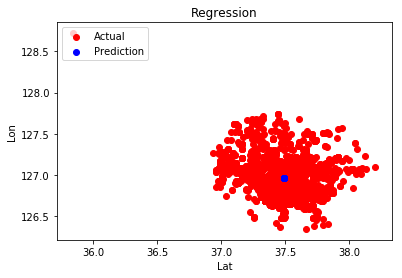

In [43]:
# plot?
plt.scatter(y_test.iloc[:, 0], y_test.iloc[:, 1], color = "red", label = 'Actual')
plt.scatter(y_pred[:, 0], y_pred[:, 1], color = "blue", label = 'Prediction')
plt.title('Regression')
plt.xlabel('Lat')
plt.ylabel('Lon')
plt.legend(loc='upper left')
plt.show()

In [ ]:
# grid-search
